This project is a simple project for pricing a Double No-Touch option using Monte Carlo Simulation

We are assuming the stock prices follow GBM, i.e.:

$$
dS_t = \mu S_t \, dt + \sigma S_t \, dW_t
$$


The solution to this SDE, which is found by applying Ito on ln(St), is:

$$
S_t = S_0 \exp\left(\left(\mu - \frac{\sigma^2}{2}\right)t + \sigma W_t\right)
$$

We can thus simulate stock price paths as follows

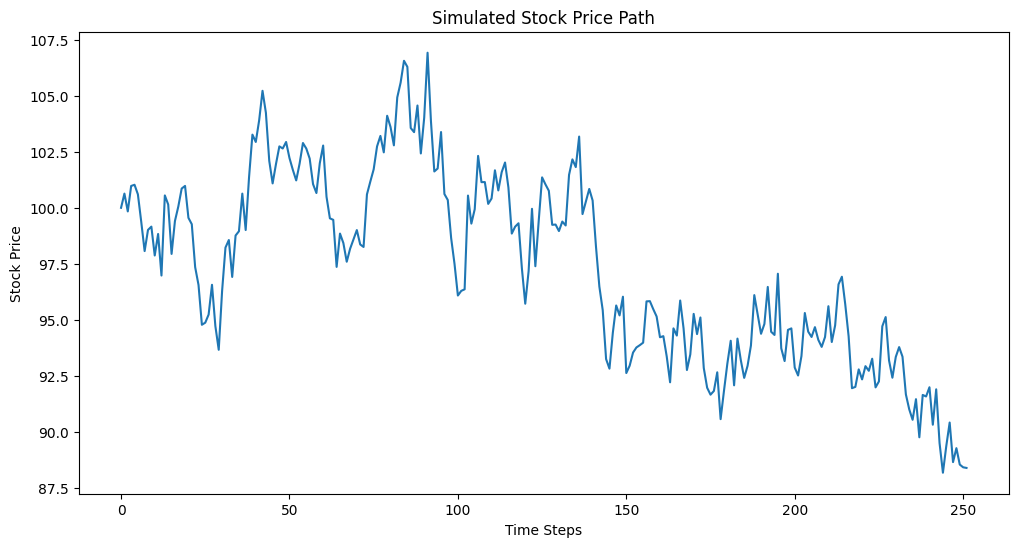

In [143]:
import numpy as np
import matplotlib.pyplot as plt

so = 100
sig = 0.2
r = 0.04
ub = 120
lb = 80
dt = 252

re = [so]

for i in range(dt-1):
    z = np.random.normal(0, 1)
    re.append(re[-1] * np.exp((r - 0.5 * sig**2) * 1/dt + sig * (1/dt)**0.5 * z))

plt.figure(figsize=(12, 6))

plt.plot(re)

plt.title('Simulated Stock Price Path')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')

plt.show()


However, the Double No-Touch is a product that pays off 100 if the stock price is between the bounds [lb,ub] and 0 otherwise. We therefore have to simulate many stock price paths using Monte Carlo.

In [144]:
npath = 2000
total = 0

paths = np.zeros((npath, dt))
for i in range(npath):
    
    #initialize the realization
    realization = np.zeros(252)
    realization[0] = so
    payoff = 100

    #create realization
    for j in range(1,dt):
        z = np.random.standard_normal()
        realization[j] = realization[j-1] * np.exp((r - 0.5 * sig**2) * 1/dt + sig * (1/dt)**0.5 * z)

        #if we touch the bounds, the payoff is 0
        if realization[j] >= ub or realization[j] <= lb:
            
            #we remove the last realization since it is not valid (above or below bounds)
            realization[j] = realization[j-1]   
            payoff = 0
            break

    paths[i,:] = realization

    #Since we receive the payoff at the end, we discount the price
    total += np.exp(-r)*payoff

print(f"The price of the Double No-Touch is {total/npath}")


The price of the Double No-Touch is 39.20020911741513


We can plot the results. This plot shows the price paths that do not touch the bounds, and reach the end of the year between ub and lb. These would result in a payoff of 100.

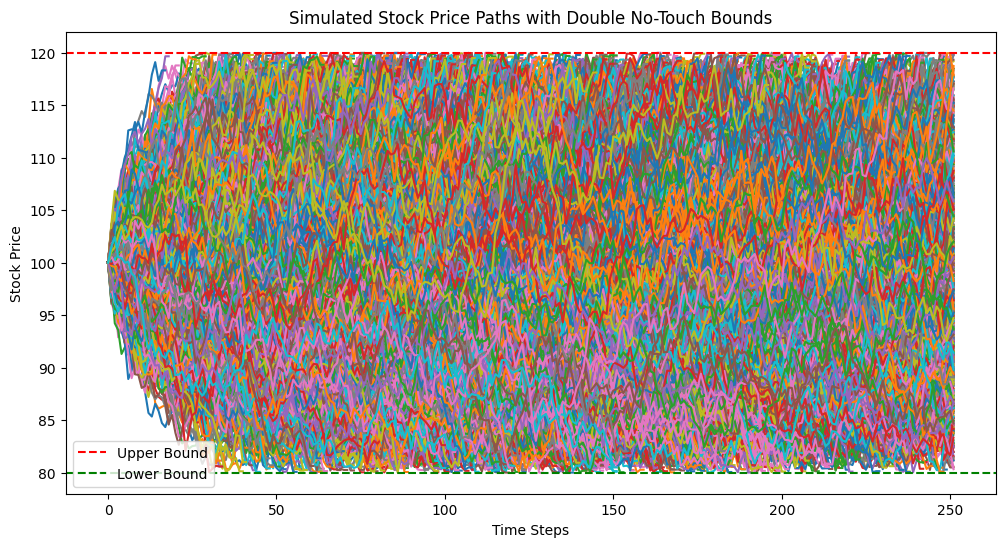

In [145]:
paths = np.where(paths == 0, np.nan, paths)

plt.figure(figsize=(12, 6))
plt.plot(paths.T)  # Plot each path with low opacity

plt.axhline(y=ub, color='red', linestyle='--', label='Upper Bound')
plt.axhline(y=lb, color='green', linestyle='--', label='Lower Bound')

plt.title('Simulated Stock Price Paths with Double No-Touch Bounds')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')

plt.legend()

plt.show()